In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist["data"], mnist["target"].astype(np.int32)

# Preprocess the data
# Normalize the data
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mnist_scaled, y_mnist, test_size=0.2, random_state=42)


In [ ]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# One-hot encode the labels
num_classes = 10
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

Model class

In [76]:
class Model:
    def __init__(self, K=10, n=784):
        self.K = K 
        self.n = n
        self.beta = np.zeros((self.K,self.n))
        self.v = np.zeros(K)
    
    def train(self, X_train, y_train_one_hot):
        for k in range(self.K):
            y_class_k = y_train_one_hot[:,k]
            ones_vec = np.ones((X_train.shape[0],1))
            A = np.hstack((X_train, ones_vec))
            theta = np.linalg.lstsq(A, y_class_k, rcond=None)[0]
            beta_k = theta[:-1]
            v_k = theta[-1]
            self.beta[k,:] = beta_k.T
            self.v[k] = v_k

    def predict(self, x):
        pred_label = np.argmax(self.beta @ x + self.v)
        return pred_label

    def report_accuracy(self, X, y):
        N = X.shape[0]
        y_pred = [self.predict(X[i, :]) for i in range(N)]
        return np.sum(y_pred==y)/N


In [77]:
digit_model = Model()

In [78]:
digit_model.train(X_train, y_train_one_hot)

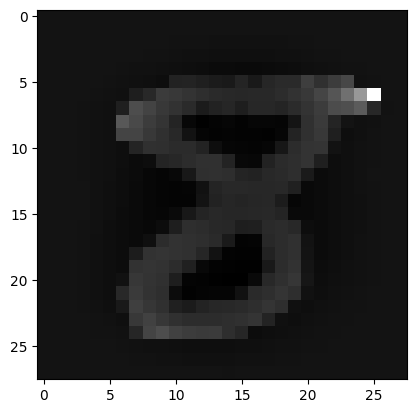

In [73]:
plt.imshow(np.reshape(X_test[0], (28,28)), cmap='gray')

In [74]:
digit_model.predict(X_test[0])

8

Accuracy on training data

In [80]:
#Training accuracy 
acc_train = digit_model.report_accuracy(X_train,y_train)
print(f"Training accuracy = {acc_train*100} %")

Training accuracy = 85.94821428571429 %


Accuracy on testing data

In [81]:
#Test set accuracy 
acc_test = digit_model.report_accuracy(X_test,y_test)
print(f"Test set accuracy = {acc_test*100} %")

Test set accuracy = 85.39285714285715 %


Accurately classified images

2


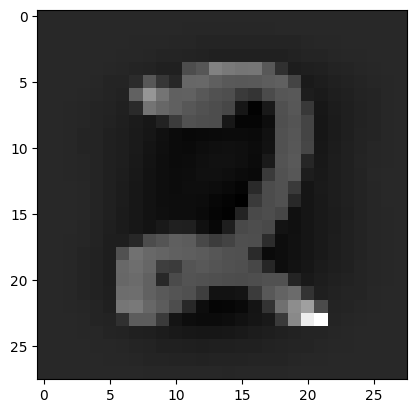

In [84]:
image = X_test[50]
plt.imshow(np.reshape(image, (28,28)), cmap='gray')
print(digit_model.predict(image))

3


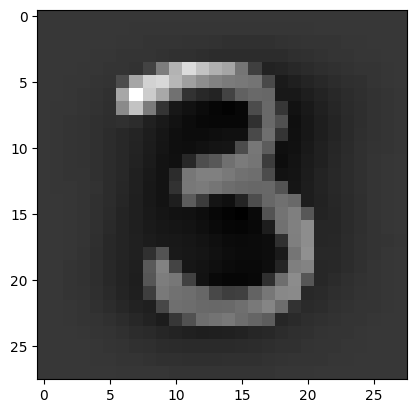

In [85]:
image = X_test[25]
plt.imshow(np.reshape(image, (28,28)), cmap='gray')
print(digit_model.predict(image))

Misclassifed image

4


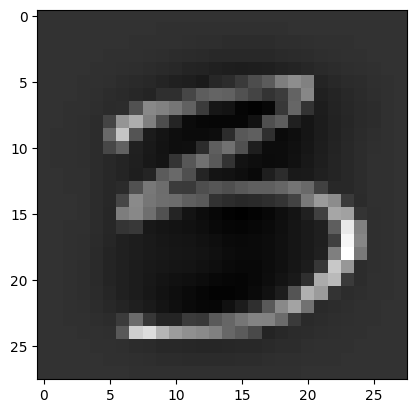

In [86]:
image = X_test[100]
plt.imshow(np.reshape(image, (28,28)), cmap='gray')
print(digit_model.predict(image))